In [71]:
plt.style.use(['dark_background'])

In [136]:
# 사용 모델 리스트 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# scaler, pipeline, mse, r2 
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data_oh = pd.read_csv("result_one_hot2")

In [4]:
data_oh

,case,fa_job,fa_edu,life_15,fama_rel_15,age,hschool,univ_mjor,level,j_type,...,jung_bi_1.0,jung_bi_2.0,job_pp_0.0,job_pp_1.0,job_pp_2.0,job_pp_3.0,job_pp_4.0,job_pp_5.0,job_pp_6.0,job_pp_7.0
0,1.0,5.0,4.0,3.0,2.0,32.0,1.0,7.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0
1,4.0,2.0,6.0,3.0,4.0,19.0,1.0,0.0,1.0,2.0,...,0,1,0,0,1,0,0,0,0,0
2,4.0,7.0,3.0,3.0,3.0,19.0,3.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,3.0,7.0,4.0,3.0,3.0,31.0,2.0,9.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,1.0,3.0,5.0,3.0,2.0,25.0,1.0,3.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,1.0,6.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1873,6.0,12.0,0.0,2.0,6.0,36.0,1.0,10.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1874,6.0,8.0,3.0,3.0,3.0,36.0,3.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1875,6.0,6.0,2.0,4.0,3.0,42.0,3.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,0


In [5]:
data_oh.columns.unique()

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0'],
      dtype='object')

In [6]:
data_oh.drop(data_oh[data_oh["case"]==1].index, inplace=True)

In [7]:
data_oh.drop(data_oh[data_oh["case"]==2].index, inplace=True)

In [8]:
data_oh

,case,fa_job,fa_edu,life_15,fama_rel_15,age,hschool,univ_mjor,level,j_type,...,jung_bi_1.0,jung_bi_2.0,job_pp_0.0,job_pp_1.0,job_pp_2.0,job_pp_3.0,job_pp_4.0,job_pp_5.0,job_pp_6.0,job_pp_7.0
1,4.0,2.0,6.0,3.0,4.0,19.0,1.0,0.0,1.0,2.0,...,0,1,0,0,1,0,0,0,0,0
2,4.0,7.0,3.0,3.0,3.0,19.0,3.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,3.0,7.0,4.0,3.0,3.0,31.0,2.0,9.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
5,3.0,12.0,1.0,5.0,6.0,27.0,3.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
6,3.0,8.0,4.0,3.0,3.0,25.0,3.0,6.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,1.0,6.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1873,6.0,12.0,0.0,2.0,6.0,36.0,1.0,10.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1874,6.0,8.0,3.0,3.0,3.0,36.0,3.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1875,6.0,6.0,2.0,4.0,3.0,42.0,3.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,0


In [10]:
faedu = pd.get_dummies(data_oh, columns=['fa_edu'])

In [11]:
faedu.columns

Index(['case', 'fa_job', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0', 'fa_edu_0.0', 'fa_edu_1.0',
       'fa_edu_2.0', 'fa_edu_3.0', 'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0',
       'fa_edu_7.0'],
      dtype='object')

In [ ]:
# 대졸 여부로 나눠서 보기

In [82]:
faedu['univ_grad'] = 0

In [83]:
faedu['univ_grad'] = faedu['edu_6.0'] + faedu['edu_7.0'] + faedu['edu_8.0'] + faedu['edu_9.0']

In [85]:
faedu['univ_grad']

1       0
2       0
3       1
5       0
6       1
       ..
1872    1
1873    1
1874    0
1875    0
1876    1
Name: univ_grad, Length: 690, dtype: int64

In [101]:
faedu['fa_edu']=0

In [105]:
faedu.columns

Index(['case', 'fa_job', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_7.0',
       'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0', 'univ_area_1.0',
       'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0', 'univ_area_5.0',
       'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0', 'univ_area_9.0',
       'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0', 'univ_area_13.0',
       'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0', 'univ_area_18.0',
       'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0', 'job_pp_0.0', 'job_pp_1.0',
       'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0', 'job_pp_6.0',
       'job_pp_7.0', 'fa_edu_0.0', 'fa_edu_1.0', 'fa_edu_2.0', 'fa_edu_3.0',
       'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0', 'fa_edu_7.0', 'univ_grad',
       'fa_edu'],
      dtype='object')

In [ ]:
# 아빠 교육 수준 대졸 여부로 나눠보기

In [104]:
faedu['fa_edu'] = faedu['fa_edu_5.0'] + faedu['fa_edu_6.0'] + faedu['fa_edu_7.0']

In [91]:
faedu.drop(['edu_1.0', 'edu_2.0','edu_3.0','edu_4.0','edu_5.0', 'edu_6.0', 'edu_9.0','edu_8.0'], axis=1, inplace=True)

In [106]:
faedu.drop(['fa_edu_0.0', 'fa_edu_1.0', 'fa_edu_2.0', 'fa_edu_3.0', 'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0', 'fa_edu_7.0'], axis=1, inplace=True)

In [170]:
X = faedu.drop(['case','JOBSAL', 'fa_job', 'life_15', 'fama_rel_15', 'j_type', 'level',
                  'hschool', 'univ_mjor', 
                  'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0', 'univ_area_5.0', 'univ_area_6.0', 
                  'univ_area_7.0', 'univ_area_8.0', 'univ_area_9.0', 'univ_area_18.0','univ_area_1.0',
                  'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0', 'univ_area_13.0', 
                  'marry_YN_1.0', 'edu_7.0', 'fa_edu',
                  'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0', 'jung_bi_2.0', 'jung_bi_0.0',
                  'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0',
                'job_pp_6.0', 'job_pp_7.0',
                   'univ_area_0.0'], axis=1)
y = data_oh["JOBSAL"]

In [165]:
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [171]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [172]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              1134.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:28:02   Log-Likelihood:                         -3803.8
No. Observations:                 690   AIC:                                      7618.
Df Residuals:                     685   BIC:                                      7640.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [177]:
# Minmax 적용 결과
import statsmodels.api as sm
model = sm.OLS(y, X_ss)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              2.527
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                      0.0280
Time:                        18:31:43   Log-Likelihood:                         -4565.9
No. Observations:                 690   AIC:                                      9142.
Df Residuals:                     685   BIC:                                      9164.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [175]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3, random_state=13)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [176]:
from sklearn.metrics import accuracy_score, r2_score
import math

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.13
r-square(test) :  0.22
rmse(train) :  59.18
rmse(test) :  53.42
-------- DecisionTreeRegressor -----------
r-square(train) :  0.22
r-square(test) :  0.18
rmse(train) :  56.11
rmse(test) :  54.85
-------- RandomForestRegressor -----------
r-square(train) :  0.25
r-square(test) :  0.23
rmse(train) :  55.23
rmse(test) :  53.01
-------- GradientBoostingRegressor -----------
r-square(train) :  0.42
r-square(test) :  0.12
rmse(train) :  48.44
rmse(test) :  56.73
-------- XGBRegressor -----------
r-square(train) :  0.51
r-square(test) :  0.02
rmse(train) :  44.45
rmse(test) :  59.87


In [145]:
names = []
train_r2_score = []
test_r2_score = []
train_rmse_score = []
test_rmse_score = []


for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(round(r2_score(y_train, y_pred_tr),2))
    test_r2_score.append(round(r2_score(y_test, y_pred_test),2))
    train_rmse_score.append(round(np.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    test_rmse_score.append(round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
    
    
    result_dum_r2 = pd.DataFrame({
        "model_name" : names,
        "train_r2_score" : train_r2_score,
        "test_r2_score" : test_r2_score,
        "train_rmse" : train_rmse_score,
        "test_rmse" : test_rmse_score,
        })

In [146]:
result_dum_r2

,model_name,train_r2_score,test_r2_score,train_rmse,test_rmse
0,LinearRegression,0.13,0.22,59.18,53.42
1,DecisionTreeRegressor,0.22,0.18,56.11,54.85
2,RandomForestRegressor,0.37,0.19,50.41,54.28
3,GradientBoostingRegressor,0.42,0.12,48.44,56.82
4,XGBRegressor,0.51,0.02,44.45,59.87


In [151]:
import numpy as np

pipe = Pipeline([('clf', DecisionTreeRegressor())]) # 일단 파이프 하나 만들어 놓은 상태

search_space = [{'clf': [LinearRegression()]},
                {'clf': [DecisionTreeRegressor(random_state=13)],
                 'clf__max_depth': [3, 5, 10]},
                {'clf': [RandomForestRegressor(random_state=13)],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__max_depth': [3, 5, 10]},
               {'clf': [GradientBoostingRegressor(random_state=13)],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__learning_rate': [0.01, 0.05, 0.1]},
               {'clf': [XGBRegressor(random_state=13)],
                'clf__n_estimators': [10, 100, 1000],
                'clf__max_depth': [3, 5, 10],
                'clf__learning_rate': [0.01, 0.05, 0.1]}]

In [152]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train) 

In [153]:
best_model.best_estimator_

Pipeline(steps=[('clf', RandomForestRegressor(max_depth=5, random_state=13))])

## 제일 좋은 모델 RandomforestRegressor / max depth 3
## r2 값은 0.25정도 RMSE는 52정도

In [91]:
# 예측값과 실제값의 분포.. 얼추 비슷한것 같지만 ㅠㅠ

In [76]:
reg = RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)
reg.fit(X_train, y_train)
    
y_pred_tr = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

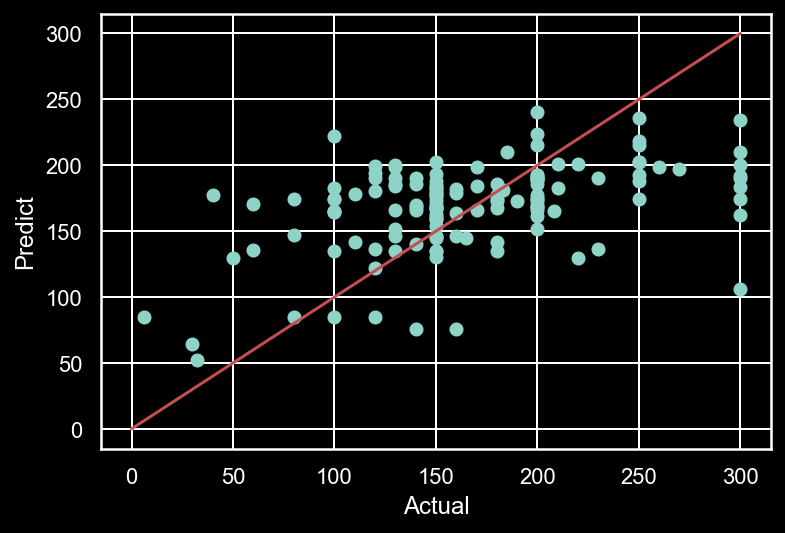

In [77]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,300], [0,300], 'r')


plt.show()

age, working_y, edu_7.0, marry_YN_2.0, jung_bi_1.0, fa_edu_6.0

In [73]:
# 나이, 경력, 4년재 대학 졸업여부, 미혼인지(미혼이 1, 기혼이 0), 정규직이라면 1, 아빠의 학력이 4년재 대학졸업인지

In [ ]:
ls = [32, 6, 1, 0, 1, 1]
model.predict(ls)